<a href="https://colab.research.google.com/github/RobertaAb/IA_Exercicios/blob/main/arvoreDecisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando as bibliotecas necessárias:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [3]:
# Carregando a base de dados:
df_diabetes = pd.read_csv('/diabetes.csv')
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Informaçoes sobre a base:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Dividindo os dados em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(df_diabetes.drop('Outcome',axis=1),df_diabetes['Outcome'],test_size=0.3)


In [6]:
# Verificando as formas dos dados:
X_train.shape,X_test.shape

((537, 8), (231, 8))

In [7]:
y_train.shape,y_test.shape

((537,), (231,))

In [9]:
# Instânciando o objeto classificador:
clf = DecisionTreeClassifier()

In [10]:
# Treinando o modelo de arvore de decisão:
clf = clf.fit(X_train,y_train)

In [11]:
# Verificando as features mais importantes para o modelo treinado:
clf.feature_importances_

array([0.08585854, 0.28146278, 0.09033604, 0.04362989, 0.02965042,
       0.19020437, 0.15157033, 0.12728765])

In [13]:
for feature,importancia in zip(df_diabetes.columns,clf.feature_importances_):
    print("{}:{}".format(feature, importancia))

Pregnancies:0.0858585358891995
Glucose:0.2814627764706781
BloodPressure:0.09033603922520718
SkinThickness:0.043629889067623835
Insulin:0.029650417284825887
BMI:0.19020436568318327
DiabetesPedigreeFunction:0.15157032771510998
Age:0.1272876486641724


In [14]:
resultado = clf.predict(X_test)
resultado

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [15]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       149
           1       0.61      0.56      0.58        82

    accuracy                           0.71       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.71      0.71      0.71       231



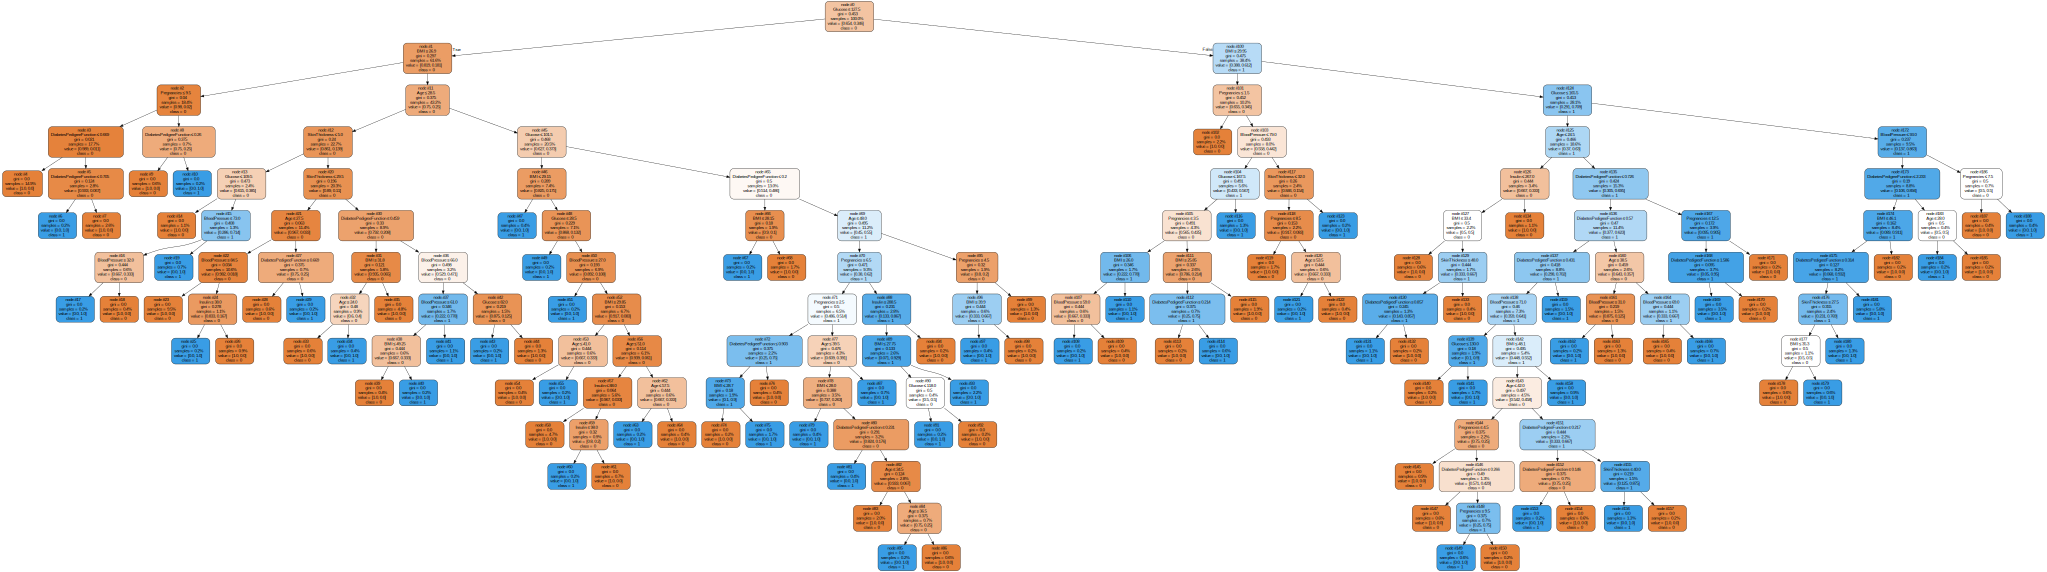

In [16]:
# Renderizando a árvore de forma gráfica:
!pip install ipywidgets
!pip3 install graphviz
!pip3 install pydot
import pydot
import graphviz

dot_data = export_graphviz( 
         clf, 
         out_file=None,
         feature_names=df_diabetes.drop('Outcome',axis=1).columns,
         class_names=['0','1'],  
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph

In [17]:
# Renderizando a árvore de forma interativa:
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source

In [18]:
# feature matrix
X,y = df_diabetes.drop('Outcome',axis=1),df_diabetes['Outcome']

In [19]:
# feature labels
features_label = df_diabetes.drop('Outcome',axis=1).columns

In [20]:
# class label
class_label = ['0','1']

In [21]:
def plot_tree(crit, split, depth, min_samples_split, min_samples_leaf=0.2):
    estimator = DecisionTreeClassifier(
           random_state = 0 
          ,criterion = crit
          ,splitter = split
          ,max_depth = depth
          ,min_samples_split=min_samples_split
          ,min_samples_leaf=min_samples_leaf
    )
    estimator.fit(X, y)
    graph = Source(export_graphviz(estimator
      , out_file=None
      , feature_names=features_label
      , class_names=class_label
      , impurity=True
      , filled = True))
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4,5,10,20,30]
   , min_samples_split=(1,5)
   , min_samples_leaf=(1,5))

display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

In [22]:
# Visualizando as fronteiras criadas pela arvore:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

def visualize_fronteiras(msamples_split,max_depth):
    X = df_diabetes[['Glucose','Insulin']].values
    y = df_diabetes.Outcome.values
    clf = DecisionTreeClassifier(min_samples_split=msamples_split,max_depth=max_depth)
    tree = clf.fit(X, y)

    plt.figure(figsize=(16,9))
    plot_decision_regions(X, y, clf=tree, legend=2)

    plt.xlabel('Glucose')
    plt.ylabel('Insulin')
    plt.title('Decision Tree')
    plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


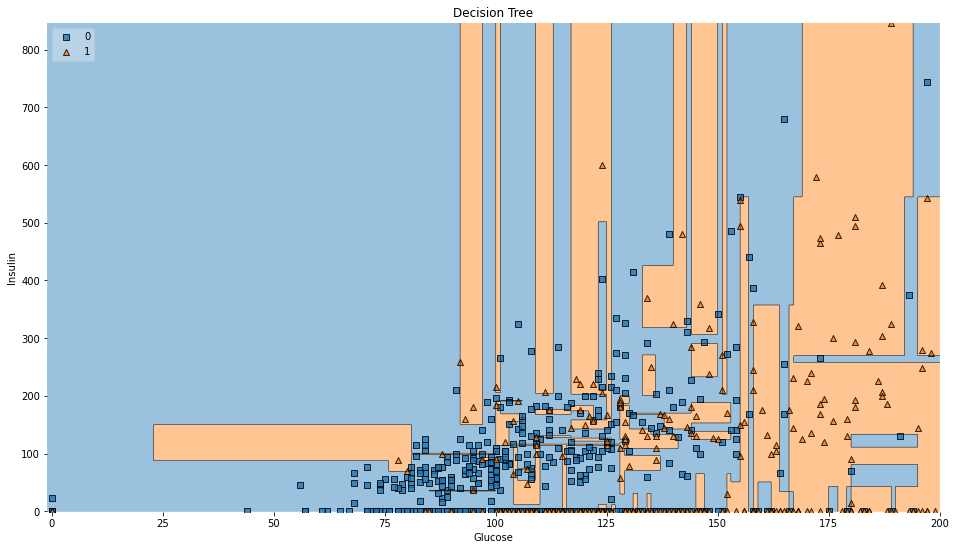

In [23]:
# Chamando a função criada anteriormente:

visualize_fronteiras(2,max_depth=30)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


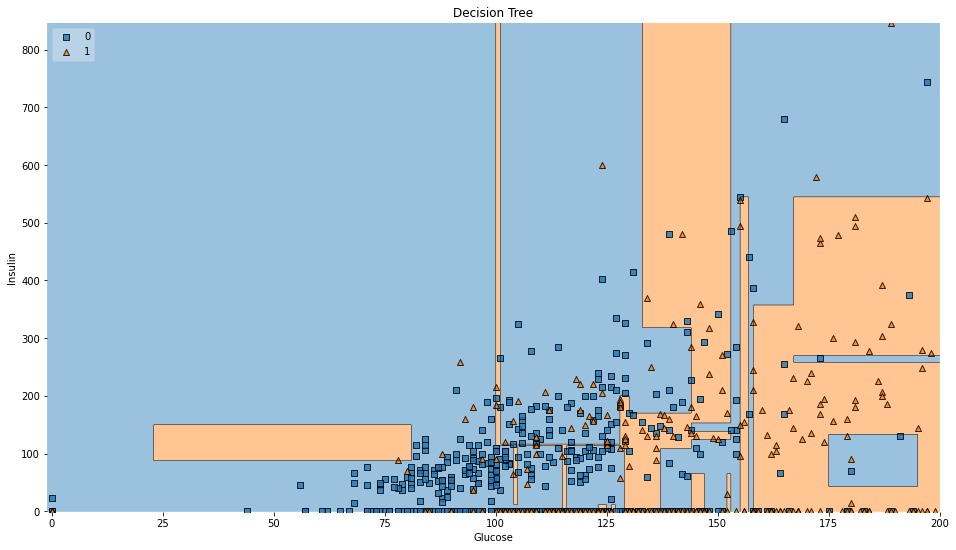

In [24]:
# Chamando a função criada anteriormente:

visualize_fronteiras(10,max_depth=8)


In [25]:
# Navegando na estrutura da arvore de decisão:
estimator = DecisionTreeClassifier(max_depth=3,min_samples_split=2,min_samples_leaf=2)
estimator.fit(X, y)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

print("Número de nós: {}".format(n_nodes))

Número de nós: 15


In [26]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("\nA arvore binária tem %s nós e a seguinte estrutura: \n"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snó=%s (nó folha)." % (node_depth[i] * "\t", i))
    else:
        print("%snó=%s (nó teste): vai para o nó %s se o valor do atributo %s <= %s \n se não, vai para o "
              "nó %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 df_diabetes.columns[feature[i]],
                 threshold[i],
                 children_right[i],
                 ))


A arvore binária tem 15 nós e a seguinte estrutura: 

nó=0 (nó teste): vai para o nó 1 se o valor do atributo Glucose <= 127.5 
 se não, vai para o nó 8.
	nó=1 (nó teste): vai para o nó 2 se o valor do atributo Age <= 28.5 
 se não, vai para o nó 5.
		nó=2 (nó teste): vai para o nó 3 se o valor do atributo BMI <= 45.39999961853027 
 se não, vai para o nó 4.
			nó=3 (nó folha).
			nó=4 (nó folha).
		nó=5 (nó teste): vai para o nó 6 se o valor do atributo BMI <= 26.350000381469727 
 se não, vai para o nó 7.
			nó=6 (nó folha).
			nó=7 (nó folha).
	nó=8 (nó teste): vai para o nó 9 se o valor do atributo BMI <= 29.949999809265137 
 se não, vai para o nó 12.
		nó=9 (nó teste): vai para o nó 10 se o valor do atributo Glucose <= 145.5 
 se não, vai para o nó 11.
			nó=10 (nó folha).
			nó=11 (nó folha).
		nó=12 (nó teste): vai para o nó 13 se o valor do atributo Glucose <= 157.5 
 se não, vai para o nó 14.
			nó=13 (nó folha).
			nó=14 (nó folha).


In [28]:
def extrai_regras(sample_id):
    node_indicator = estimator.decision_path(X)

    leave_id = estimator.apply(X)

    #sample_id = sample
    node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                        node_indicator.indptr[sample_id + 1]]

    print('\nFeatures usadas para predizer a amostra %s' % (sample_id))

    for f,v in zip(df_diabetes.columns,X.iloc[sample_id].values):
        print('%s = %s'%(f,v))

    print('\n')      
    for node_id in node_index:
        if leave_id[sample_id] == node_id:
            continue

        if (X.iloc[sample_id, feature[node_id]] <= threshold[node_id]):
            threshold_sign = "<="
        else:
            threshold_sign = ">"

        print("id do nó de decisão %s : (atributo %s com valor = %s %s %s)"
              % (node_id,
                 df_diabetes.columns[feature[node_id]],
                 X.iloc[sample_id, feature[node_id]],
                 threshold_sign,
                 threshold[node_id]))
        
    pred =estimator.predict(X.iloc[sample_id].values.reshape(1, -1))
    print(pred) 
    print("\tClasse => %s" %pred)

In [32]:
extrai_regras(2)
#features usadas para predizer a amostra 2
Pregnancies = 8.0
Glucose = 183.0
BloodPressure = 64.0
SkinThickness = 0.0
Insulin = 0.0
BMI = 23.3
DiabetesPedigreeFunction = 0.672
Age = 32.0


Features usadas para predizer a amostra 2
Pregnancies = 8.0
Glucose = 183.0
BloodPressure = 64.0
SkinThickness = 0.0
Insulin = 0.0
BMI = 23.3
DiabetesPedigreeFunction = 0.672
Age = 32.0


id do nó de decisão 0 : (atributo Glucose com valor = 183 > 127.5)
id do nó de decisão 8 : (atributo BMI com valor = 23.3 <= 29.949999809265137)
id do nó de decisão 9 : (atributo Glucose com valor = 183 > 145.5)
[1]
	Classe => [1]


In [33]:
extrai_regras(10)
#Features usadas para predizer a amostra 10
Pregnancies = 4.0
Glucose = 110.0
BloodPressure = 92.0
SkinThickness = 0.0
Insulin = 0.0
BMI = 37.6
DiabetesPedigreeFunction = 0.191
Age = 30.0


Features usadas para predizer a amostra 10
Pregnancies = 4.0
Glucose = 110.0
BloodPressure = 92.0
SkinThickness = 0.0
Insulin = 0.0
BMI = 37.6
DiabetesPedigreeFunction = 0.191
Age = 30.0


id do nó de decisão 0 : (atributo Glucose com valor = 110 <= 127.5)
id do nó de decisão 1 : (atributo Age com valor = 30 > 28.5)
id do nó de decisão 5 : (atributo BMI com valor = 37.6 > 26.350000381469727)
[0]
	Classe => [0]
